In [97]:
# Read confidence score of Jpred

import os
import glob
import pandas as pd
from os import path

# For one
os.chdir('/Users/Sophia/Dundee/dundee/retr231/training')


z = open('d1a1xa_.jnet', 'r')

b = z.read()



df = pd.DataFrame([x.split(';') for x in b.split('\n')])
df = df.iloc[2]

df


    # df[0] = df[0][1]
    # df_f[1] = df_f[1][0]
df[0] = df[0][9:]
#     # print(df)
df[0] = df[0].replace(',','')
# # df['PDB_ID'] = pdb
#     # df = df.T
# df.columns = ['Confidence']
#     # df.columns = ['Confidence', 'PDB_ID']
# print(df)

df.index = ['pdb']
df

pdb    8988777775278844741882588558899986588367888853...
Name: 2, dtype: object

In [24]:
import os
import pandas as pd
import glob
from os import path
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
os.chdir('/Users/Sophia/Dundee')

/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Function to save different versions of the same pdb's:

def check_file(filePath):
    if path.exists(filePath):
        numb = 1
        while True:
            newPath = "{0}_{2}{1}".format(*path.splitext(filePath) + (numb,))
            if path.exists(newPath):
                numb += 1
            else:
                return newPath
    return filePath

In [25]:
import os
import pandas as pd
import glob
from os import path

os.chdir('/Users/Sophia/Dundee/dundee/retr231/training')

# For all

# Sequence
x = glob.glob('*.fasta')

# Prediction
# y = glob.glob('*.jnet')
h = []
pdb = []

for file in x:
    scop = file[:-6]
    pdb = scop[1:5]
    x_1 = open(file, 'r')
    x_2 = open(scop + '.jnet', 'r')
    a = x_1.read()
    b = x_2.read()
    
    df = pd.DataFrame([x.split(';') for x in b.split('\n')])
    df = df.iloc[2]

    df = df[0]
    df = df[9:]
    # df = df.replace(',','')
    df = pd.DataFrame([x.split(';') for x in df.split('\n')])
    df['PDB_ID'] = pdb
    df.columns = ['confidence', 'PDB_ID']
    # h.append(df)
    # print(df)
    
    filename = check_file('/Users/Sophia/Dundee/dundee/wed/jp_conf/%s.csv' % pdb)
    df.to_csv(filename)

In [96]:
# Do it with seq + pred?
#  os.chdir('/Users/Sophia/Dundee/dundee/retr231/training')

# # Sequence
# x = glob.glob('*.fasta')

# # Prediction
# # y = glob.glob('*.jnet')

# for file in x:
#     scop = file[:-6]
#     pdb = scop[1:5]
#     x_1 = open(file, 'r')
#     x_2 = open(scop + '.jnet', 'r')
#     a = x_1.read()
#     b = x_2.read()
    
#     df = pd.DataFrame([x.split(';') for x in a.split('\n')])
#     df = df.iloc[:2]
#     df2 = pd.DataFrame([x.split(';') for x in b.split('\n')])
#     df2 = df2.iloc[:3]
#     df_f = pd.concat([df, df2], axis = 1)

#     df_f.drop_duplicates()
#     # df_f = df_f.dropna()


#     df_f['SCOPeID'] = df_f.iloc[0][0][1:]
    # df_f[0] = df_f[0][1]
    # df_f[1] = df_f[1][0]
    print(df_f)
    # df_f = df_f.drop_duplicates()
    # df_f[1] = df_f[1][0][9:]
    # df_f[1]=df_f[1].str.replace(',','')
    # print(df_f)
    
    # df_f.columns = ['J_AA Sequence', 'J_SS', 'SCOPeID']
    # df_f['PDB_ID'] = pdb
    # df_f.reindex = ['PDB_ID', 'SCOPeID', 'J_SS', 'J_AA Sequence']

    
    # filename = check_file('/Users/Sophia/Dundee/tuesday/jpred/%s.csv' % pdb)
    # df_f.to_csv(filename)

                                                   0  \
0                                           >d2ed6a1   
1  TVTKTIETHTDNIETNMDENLRIPVTAEVGSGYFKMTDVSFDSDTL...   
2                                                NaN   

                                                   0 SCOPeID  
0                                                             
1  jnetpred:-,-,-,H,H,H,H,-,-,-,-,-,-,-,-,-,-,-,-...     NaN  
2  JNETCONF:9,8,2,3,2,2,1,4,6,7,7,7,5,4,5,6,4,4,4...     NaN  
                                                   0  \
0                                           >d4fyxb2   
1  ERIDNVLVCPNSNCISHAEPVSSSFAVRKRANDIALKCKYCEKEFS...   
2                                                NaN   

                                                   0 SCOPeID  
0                                                             
1  jnetpred:-,-,E,E,E,E,E,E,-,-,-,-,-,-,-,-,-,-,-...     NaN  
2  JNETCONF:9,4,6,8,9,9,8,4,3,6,7,7,7,7,6,6,6,7,7...     NaN  
                                              

In [26]:
# Merge
os.chdir('/Users/Sophia/Dundee/dundee/wed/jp_conf')
x = glob.glob('*.csv')

df = pd.concat(
    map(pd.read_csv, [file for file in x]), ignore_index=True)

df = df.iloc[:, 1:]
df = pd.DataFrame(df)
# df = df[['PDB_ID', 'SCOPeID', 'J_SS', 'J_AA Sequence']]
print(df)
df.to_csv('/Users/Sophia/Dundee/dundee/wed/jpred_confidence.csv')

                                             confidence PDB_ID
0     9,8,4,8,8,7,1,5,7,7,7,7,7,6,5,3,3,8,9,9,9,9,9,...   3sxu
1     9,9,7,3,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,...   3f42
2     9,9,8,1,3,2,1,0,0,2,7,7,1,3,5,8,9,9,9,9,9,9,9,...   2lig
3     8,1,7,9,9,9,9,9,9,9,9,9,9,9,8,7,3,5,8,4,2,3,1,...   2pu9
4     9,9,2,6,8,9,9,8,8,6,1,5,7,7,7,7,7,7,7,7,0,4,8,...   1wny
...                                                 ...    ...
1343  9,9,6,5,8,9,8,7,5,7,8,7,1,5,7,8,7,3,6,8,9,9,9,...   3mqd
1344  9,9,7,4,8,9,9,8,5,0,8,8,7,3,6,7,6,3,2,1,6,9,9,...   4ead
1345  8,9,8,8,7,7,7,7,7,7,7,7,7,7,6,5,2,2,8,9,9,9,9,...   1kpt
1346  6,2,0,0,1,1,1,0,1,1,6,8,8,8,7,6,2,7,8,9,9,9,9,...   1kqp
1347  9,3,4,8,8,2,2,7,8,8,8,4,1,8,8,9,9,8,7,2,5,8,8,...   2ebs

[1348 rows x 2 columns]


In [84]:
# Confidence

from cmath import nan
import os
import pandas as pd
import numpy as np



data = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/jpred_confidence.csv')
data.iloc[:, 1] = data.iloc[:, 1].str.replace(',', '')
pdb = []
# print(data)

for i,row in data.iterrows():
    pdb_id = row.iloc[2]
    
    pdb.append(pdb_id)
    
df_p = pd.DataFrame(pdb)
# print(df_p)
df_new = data['confidence'].astype(str).apply(lambda x: pd.Series(list(x)))
# print(df_new)
# # df_new = df_new.dropna()
df_new = df_new.dropna(axis=1, how = 'all')
df_new['pdb_id'] = df_p
df_new
# print(df_new)
# print(data)
# print(df_new)

# df_new['pdb_id'] = df_p

for i,row in df_new.iterrows(): # not df_new
    pdb_ID = row.iloc[-1]
    sh = row[:-1]
    sh = sh.dropna()
# #     # print(sh)
# # #     sh.to_csv('/homes/2524591/data/shift_merged/J_ssPred_split/%s.csv' % pdb)

    file = check_file(f'/Users/Sophia/Dundee/dundee/wed/conf/{pdb_ID}.csv')
    try:
        sh.to_csv('' + file)
    except ValueError:
        print('something wrong with: ' + pdb_id)

In [88]:
# Add an extra column in pro_final files with JP confidence


# Merge Jpred prediction and ss

os.chdir('/Users/Sophia/Dundee/dundee/tuesday/data')

dir = os.listdir('J_seq')

# data = pd.read_csv('merged_w_AF/1rg8.csv')
# print(data)

for file in dir:
    try:
        df = pd.read_csv('J_seq/%s' % file)
        df_1 = pd.read_csv('J_ss/%s' % file)

        df_2 = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/conf/%s' % file)

        df_2 = pd.concat([df, df_1, df_2], axis=1)
        df_2 = df_2.iloc[:, [1, 3, 5]]
        # print(df_2)

        df_2.to_csv('/Users/Sophia/Dundee/dundee/wed/JP/%s' % file)
    except IsADirectoryError:
        print(f'Invalid data: {file}')



In [90]:
# Ignore this
# # JPred files merged with AF_Pro

# os.chdir('/homes/2524591/data')

# os.chdir('/Users/Sophia/Dundee/tuesday/data')
import os
import pandas as pd
import numpy as np
import re

# dir = os.listdir('/homes/2524591/data/AF_Pro')
# os.chdir('/Users/Sophia/Dundee/dundee/data')

dir = os.listdir('/Users/Sophia/Dundee/dundee/data/AF_Pro')


for file in dir:
    try:
        df = pd.read_csv('/Users/Sophia/Dundee/dundee/data/AF_Pro/' + file)
        pdb = file[:4]
        
        file_af = check_file(f'/Users/Sophia/Dundee/dundee/wed/Pro_final/{pdb}.csv')

        df_j = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/JP/%s.csv' % pdb)
        df_j = df_j.dropna()
        j_sel= df_j.iloc[:, 1]
        tsp = j_sel.iloc[0]
        df['Jpred_seq'] = j_sel  


        j_ss = df_j.iloc[:, 2]
        hm = j_ss.iloc[0]
        df['Jpred_SS_pred'] = j_ss

        conf = df_j.iloc[:, 3]
        k = conf.iloc[0]
        df['JP_Confidence'] = conf


        df = df.replace('-', 'C', regex=True)


#     Uncomment to save
        df.to_csv(file_af) 

        # If there are multiple copies:
        if os.path.exists(f'/Users/Sophia/Dundee/dundee/wed/JP/{pdb}_1.csv'):
            file = check_file(f'/Users/Sophia/Dundee/dundee/wed/JP/{pdb}.csv')
            x = file[-5]
            z = int(x)
            for i in range(1, z): #len(x)??
                try:                   
                    df_j = pd.read_csv(f'/Users/Sophia/Dundee/dundee/wed/JP/{pdb}_{i}.csv')
                    df_j.dropna()
                    j_sel= df_j.iloc[:, 1]
                    tsp = j_sel.iloc[0]
                    df['Jpred_seq'] = j_sel
                                        
                    j_ss = df_j.iloc[:, 2]
                    hm = j_ss.iloc[0]
                    df['Jpred_SS_pred'] = j_ss

                    conf = df_j.iloc[:, 3]
                    k = conf.iloc[0]
                    df['JP_Confidence'] = conf


                    df = df.replace('-', 'C', regex=True) 
                    
                    filee = check_file(f'/Users/Sophia/Dundee/dundee/wed/Pro_final/{pdb}.csv')
#                     Uncomment to save -- but if run multiple times, will save the same file with diff. name
                    df.to_csv(filee)
                except FileNotFoundError:
                    print(f'Something wrong with: {pdb}')
                    continue
                    
     
    except FileNotFoundError:
        print(f'{pdb} not found')
        continue
    except IsADirectoryError:
        print(f'Invalid data: {pdb}')
        continue
     



3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found


In [91]:
# Ignore
import glob
os.chdir('/Users/Sophia/Dundee/dundee/wed')

# JPred
# x = glob.glob('J_ss/*.csv')
# x_1 = glob.glob('J_seq/*.csv')
# y = glob.glob('JP/*.csv')

# AF with ProIntVar
# y_1 = glob.glob('AF_Pro/*.csv')


z_2 = glob.glob('Pro_final/*.csv')


# print(len(x),len(x_1))
# print(len(y))

# print(len(y_1))
print(len(z_2))

1540


In [92]:
# Ignoree
os.chdir('/Users/Sophia/Dundee/dundee/wed/Pro_final')


x = glob.glob('*.csv')
a_1 = []
a_2 = []
b = 0
c = 0
d = 0


for file in x:
    pdb = file[:-4]
    df = pd.read_csv(file)

    # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])
    # print(df['Jpred_seq'].iloc[:1], pdb)

    # Check if first letter matches
    if (df['Jpred_seq'].iloc[:1] == df['UniProt_dbResName'].iloc[:1]).all() == True:
        # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
        b += 1
        a_1.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/wed/check_scop/{pdb}.csv')
    else:
        d += 1
        a_2.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/wed/jp_align/{pdb}.csv')


print(b)
print(d)

# 549 need mapping from SCOPe to PDB

1056
484


In [ ]:
# Get pdb's that match

os.chdir('/Users/Sophia/Dundee/dundee/tuesday/data/match_4')
x = glob.glob('*.csv')

for file in x:
    df = pd.read_csv(f'/Users/Sophia/Dundee/dundee/wed/Pro_final/{file}')

    




    

In [12]:
# Get AF confidence score

import os
from prointvar.config import config as cfg
from prointvar.pdbx import PDBXreader
from prointvar.fetchers import download_structure_from_pdbe

# download_structure_from_pdbe('2pah')
input_struct = os.path.join('/Users/Sophia/Dundee/dundee/data/AF/AF_pdb_files', '1a12.pdb')
df = PDBXreader(inputfile=input_struct).atoms(format_type="pdb")
# pandas DataFrame

# print(df)

print(df['B_iso_or_equiv'])

2022-08-24 15:13:57,543 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:13:57,769 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:13:57,773 prointvar    INFO     PDBx reset atom numbers...


0       49.30
1       49.30
2       49.30
3       49.30
4       49.30
        ...  
3148    41.04
3149    41.04
3150    41.04
3151    41.04
3152    41.04
Name: B_iso_or_equiv, Length: 3153, dtype: float64


In [17]:
# Do it for all and save
import glob

import os
from prointvar.config import config as cfg
from prointvar.pdbx import PDBXreader
from prointvar.fetchers import download_structure_from_pdbe

os.chdir('/Users/Sophia/Dundee/dundee/data/AF/AF_pdb_files')

x = glob.glob('*.pdb')


for file in x:
    pdb = file[:-4]
    input_struct = os.path.join('/Users/Sophia/Dundee/dundee/data/AF/AF_pdb_files', file)

    try:
        df = PDBXreader(inputfile=input_struct).atoms(format_type="pdb")
        df = df['B_iso_or_equiv']
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/AF_conf/%s.csv' % pdb)
    except IndexError:
        print(f'Something wrong with {pdb}')

# print(df)


# Somoething wrong with:
# 1x6o
# 3ku3
# 2b59
# 1vyr
# 4au1
#  4fio
# Something wrong with 2ppv
# Something wrong with 4jp6
# 1iom
# Something wrong with 3h1d
# Something wrong with 1whz
# Something wrong with 1e7l
# Something wrong with 2nnu
# and others

2022-08-24 15:26:24,115 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:24,340 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:24,345 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:24,376 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:24,716 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:24,722 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:24,790 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:24,797 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:24,928 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:24,932 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:24,959 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1x6o


2022-08-24 15:26:25,056 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:25,058 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:25,083 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:25,301 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:25,307 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:25,353 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:25,362 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3ku3


2022-08-24 15:26:26,486 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:26,497 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:26,619 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:26,697 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:26,699 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:26,714 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:26,719 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:26,822 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:26,825 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:26,855 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2b59_2


2022-08-24 15:26:26,991 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:26,993 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:27,019 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:27,026 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:27,091 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:27,094 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:27,113 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1vyr


2022-08-24 15:26:27,383 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:27,388 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:27,432 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:27,651 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:27,654 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:27,684 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:27,843 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:27,845 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:27,871 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:27,980 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:27,982 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:28,005 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:28,134 prointvar    INFO     PDBx removed existing hydr

Something wrong with 4au1


2022-08-24 15:26:29,406 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:29,408 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:29,446 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:29,541 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:29,543 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:29,563 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:29,733 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:29,736 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:29,763 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:29,769 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:29,775 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:29,780 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4fio
Something wrong with 2ppv
Something wrong with 4jp6


2022-08-24 15:26:29,999 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:30,002 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:30,036 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:30,617 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:30,628 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:30,736 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:30,904 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:30,908 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:30,931 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:31,206 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:31,210 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:31,251 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:31,394 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1iom


2022-08-24 15:26:32,148 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:32,156 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:32,238 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:32,343 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:32,346 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:32,373 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:32,723 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:32,727 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:32,771 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,025 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:33,029 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:33,063 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,427 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3h1d
Something wrong with 1whz


2022-08-24 15:26:33,710 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:33,712 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:33,728 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,781 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:33,784 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:33,801 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,807 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,918 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:33,920 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:33,935 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,940 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:33,976 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:33,978 prointvar    INFO     PDBx reset atom numbe

Something wrong with 1e7l
Something wrong with 2nnu


2022-08-24 15:26:34,198 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,201 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:34,229 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,268 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,271 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:34,285 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,526 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,530 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:34,564 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,570 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,576 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,697 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,699 prointvar    INFO     PDBx reset atom numbe

Something wrong with 3oxp
Something wrong with 3c8w


2022-08-24 15:26:34,776 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,778 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:34,796 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:34,865 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:34,867 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:34,886 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:35,958 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:35,970 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:36,087 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,092 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,271 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:36,274 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2gkg


2022-08-24 15:26:36,299 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,304 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,377 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:36,379 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:36,401 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,406 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1pvm
Something wrong with 2fcl


2022-08-24 15:26:36,661 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:36,663 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:36,680 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:36,964 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:36,968 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:37,003 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:37,156 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:37,158 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:37,180 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:37,539 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:37,544 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:37,594 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:37,701 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2ahm


2022-08-24 15:26:38,154 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:38,336 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:38,339 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:38,366 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:38,416 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:38,418 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:38,435 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:38,537 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:38,539 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:38,557 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:38,590 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:38,592 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:38,605 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2f9h


2022-08-24 15:26:39,478 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:39,489 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:39,587 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:39,717 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:39,719 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:39,746 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:39,828 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:39,831 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:39,850 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:39,977 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:39,980 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:40,002 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:40,303 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3gmx


2022-08-24 15:26:40,635 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:40,638 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:40,667 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:40,714 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:40,716 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:40,735 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:40,780 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:40,782 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:40,800 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:40,807 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:40,960 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:40,964 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:40,994 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2j4w


2022-08-24 15:26:41,134 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:41,138 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:41,166 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:41,430 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:41,433 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:41,472 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:41,646 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:41,649 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:41,676 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:41,901 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:41,904 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:41,934 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:42,061 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1zce


2022-08-24 15:26:42,372 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:42,375 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:42,408 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:42,631 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:42,633 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:42,668 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:43,473 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:43,481 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:43,575 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:43,628 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:43,630 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:43,647 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:43,653 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1s2x


2022-08-24 15:26:43,859 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:43,931 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:43,933 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:43,954 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:44,024 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:44,026 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:44,049 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:44,056 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1t6a


2022-08-24 15:26:44,324 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:44,327 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:44,364 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:44,588 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:44,592 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:44,624 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:44,728 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:44,731 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:44,752 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:44,759 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1kaf


2022-08-24 15:26:45,007 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:45,010 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:45,050 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:45,127 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:45,130 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:45,149 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:45,375 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:45,377 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:45,408 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:45,467 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:45,469 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:45,487 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:45,825 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2gf4


2022-08-24 15:26:46,656 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:46,660 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:46,704 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:46,784 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:46,786 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:46,806 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:46,946 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:46,949 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:46,978 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,069 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:47,071 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:47,092 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,098 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 3a9s
Something wrong with 1weh
Something wrong with 2rde
Something wrong with 2r31


2022-08-24 15:26:47,370 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:47,373 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:47,399 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,406 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4hdr


2022-08-24 15:26:47,661 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:47,665 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:47,708 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,716 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,724 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:47,909 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:47,912 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1rwh
Something wrong with 1u2h


2022-08-24 15:26:47,944 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:48,040 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,043 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,065 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:48,258 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,260 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,286 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:48,356 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,358 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,376 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:48,453 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,455 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,474 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1ecw
Something wrong with 1lg7


2022-08-24 15:26:48,680 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,684 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,719 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:48,887 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:48,890 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:48,917 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,005 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,008 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,032 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,040 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,124 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,126 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,144 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2hng


2022-08-24 15:26:49,343 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,346 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,376 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,423 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,425 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,443 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,526 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,528 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,547 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,641 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:49,644 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:49,664 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:49,776 prointvar    INFO     PDBx removed existing hydr

Something wrong with 4ler
Something wrong with 1qex
Something wrong with 1f1m


2022-08-24 15:26:50,374 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:50,377 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:50,401 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:50,480 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:50,483 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:50,503 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:50,532 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:50,534 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:50,552 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:50,594 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:50,597 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:50,614 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:50,691 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2apl


2022-08-24 15:26:51,738 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:52,016 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:52,019 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:52,060 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:52,274 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:52,277 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:52,306 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:52,575 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:52,578 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:52,617 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:52,663 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:52,665 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:52,682 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2csb
Something wrong with 2od0


2022-08-24 15:26:55,005 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,010 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,056 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,063 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,127 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,129 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,148 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,223 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,225 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,244 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1c5e


2022-08-24 15:26:55,382 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,385 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,415 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,506 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,508 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,527 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,533 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:55,605 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:55,608 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:55,626 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1l0q


2022-08-24 15:26:56,153 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:56,159 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:56,229 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:56,368 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:56,371 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:56,398 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:56,594 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:56,598 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:56,627 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:56,696 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:56,698 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:56,717 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:56,724 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2ii1


2022-08-24 15:26:57,057 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:57,060 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:57,090 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:57,207 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:57,209 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:57,232 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:57,339 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:57,341 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:57,365 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:57,427 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:57,429 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:57,449 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:57,477 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3jqk
Something wrong with 2r0x


2022-08-24 15:26:58,220 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:58,222 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:58,243 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,297 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:58,300 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:58,318 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,374 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:58,376 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:58,396 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,602 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:58,606 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:58,639 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,646 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1i71


2022-08-24 15:26:58,884 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:58,888 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:58,916 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,923 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:58,929 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:59,037 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:59,039 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:59,061 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1gxm
Something wrong with 1knz


2022-08-24 15:26:59,229 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:59,232 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:59,260 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:59,424 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:59,427 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:59,451 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:59,666 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:59,668 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:59,699 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:59,789 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:26:59,791 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:26:59,809 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:26:59,928 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1ov9


2022-08-24 15:27:01,939 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:01,941 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:01,969 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,117 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:02,119 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:02,142 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,147 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2f4i


2022-08-24 15:27:02,793 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:02,800 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:02,882 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,888 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,894 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,924 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:02,926 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:02,942 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:02,948 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:03,001 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:03,004 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:03,020 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2dxu
Something wrong with 2fcj
Something wrong with 1t77


2022-08-24 15:27:03,146 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:03,149 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:03,172 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:03,511 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:03,517 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:03,575 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:03,652 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:03,655 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:03,674 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:03,734 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:03,736 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:03,753 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:04,104 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2j8g
Something wrong with 1vcl
Something wrong with 2huh
Something wrong with 1f0l
Something wrong with 3pms
Something wrong with 1xak


2022-08-24 15:27:04,425 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:04,427 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:04,447 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:04,542 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:04,544 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:04,563 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:04,829 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:04,833 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:04,875 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:04,910 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:04,912 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:04,928 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:05,116 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2j97
Something wrong with 1mtp


2022-08-24 15:27:07,208 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,212 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:07,265 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,271 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,330 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,332 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:07,348 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,457 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,460 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2huj


2022-08-24 15:27:07,481 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,517 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,519 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:07,536 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,611 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,613 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:07,631 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,638 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,828 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:07,830 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1zbp


2022-08-24 15:27:07,857 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:07,865 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:08,026 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:08,028 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:08,055 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2cs7


2022-08-24 15:27:08,359 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:08,362 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:08,405 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:08,477 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:08,479 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:08,496 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:08,589 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:08,591 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:08,609 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:08,735 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:08,738 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:08,760 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:08,767 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2a1v


2022-08-24 15:27:09,117 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:09,121 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:09,153 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:09,294 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:09,296 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:09,318 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:09,324 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:09,436 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:09,438 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:09,459 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2pk8


2022-08-24 15:27:09,781 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:09,785 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:09,831 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:09,838 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:09,844 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,010 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,012 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 3d3r
Something wrong with 4ay7


2022-08-24 15:27:10,038 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,045 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,071 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,073 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:10,087 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,212 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,215 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:10,239 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2gpi


2022-08-24 15:27:10,553 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,557 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:10,599 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,660 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,662 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:10,680 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:10,738 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:10,740 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:10,758 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:11,146 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:11,150 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:11,202 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:11,354 prointvar    INFO     PDBx removed existing hydr

Something wrong with 4hdr_1


2022-08-24 15:27:11,871 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:11,875 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:11,918 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,112 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,115 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:12,144 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,264 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,266 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:12,290 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,343 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,344 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:12,361 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,426 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1pm4


2022-08-24 15:27:12,701 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,704 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:12,726 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,781 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,783 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:12,811 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:12,983 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:12,985 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:13,014 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,152 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:13,155 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:13,177 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,183 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2g38
Something wrong with 1b25


2022-08-24 15:27:13,386 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,392 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,400 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,407 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,413 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4jer
Something wrong with 1l0s
Something wrong with 3awu
Something wrong with 2i0z


2022-08-24 15:27:13,733 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:13,736 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:13,785 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:13,940 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:13,943 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:13,971 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,139 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:14,142 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:14,175 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,182 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,235 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:14,237 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:14,257 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2phc
Something wrong with 2a2l


2022-08-24 15:27:14,443 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:14,446 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:14,474 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,674 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:14,677 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:14,713 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,720 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:14,805 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:14,807 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:14,828 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2xi8


2022-08-24 15:27:15,039 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:15,042 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:15,074 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:15,135 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:15,138 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:15,157 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:15,482 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:15,486 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:15,535 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:15,542 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:15,659 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:15,661 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:15,685 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2j9w


2022-08-24 15:27:15,768 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:15,771 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:15,791 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:16,343 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:16,349 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:16,418 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:16,879 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:16,884 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:16,942 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,094 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:17,096 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:17,122 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,128 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2z16


2022-08-24 15:27:17,494 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:17,497 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:17,528 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,609 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:17,611 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:17,631 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,637 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,694 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:17,696 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:17,714 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:17,771 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:17,773 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:17,791 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1q88


2022-08-24 15:27:18,476 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:18,483 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:18,575 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:18,645 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:18,648 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:18,669 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:18,717 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:18,719 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:18,736 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:18,922 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:18,924 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:18,952 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:19,023 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2ob5


2022-08-24 15:27:19,343 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:19,345 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:19,362 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:19,452 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:19,454 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:19,473 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:19,598 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:19,601 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:19,625 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:19,746 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:19,749 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:19,775 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:19,782 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2a65


2022-08-24 15:27:20,106 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:20,110 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:20,169 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:20,212 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:20,261 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:20,263 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:20,282 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1t1e


2022-08-24 15:27:20,435 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:20,438 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:20,466 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:20,812 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:20,816 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:20,872 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:20,879 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:21,035 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:21,039 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:21,064 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2p8t


2022-08-24 15:27:21,402 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:21,407 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:21,458 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:21,618 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:21,622 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:21,651 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:21,697 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:21,699 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:21,716 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:21,799 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:21,801 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:21,821 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:21,891 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1lm5


2022-08-24 15:27:22,980 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:22,984 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,032 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,085 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,087 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,105 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,111 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,169 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,172 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,187 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2pv4


2022-08-24 15:27:23,347 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,349 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,376 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,478 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,482 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,504 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,801 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,806 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,848 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:23,944 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:23,947 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:23,968 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:24,017 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3db7


2022-08-24 15:27:25,780 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:26,065 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:26,068 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:26,107 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:26,305 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:26,308 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:26,342 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:26,694 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:26,699 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:26,745 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:26,799 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:26,801 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:26,819 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2p90


2022-08-24 15:27:27,491 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,493 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:27,515 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,522 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,552 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,554 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:27,568 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,678 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,680 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:27,704 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2fg1


2022-08-24 15:27:27,765 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,767 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:27,784 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,830 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,832 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:27,848 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,854 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:27,992 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:27,996 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,023 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,048 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,052 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 3eer


2022-08-24 15:27:28,067 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,076 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,144 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,146 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,165 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,250 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,253 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,271 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3las


2022-08-24 15:27:28,444 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,446 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,471 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,477 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,579 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,581 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,603 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:28,648 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,650 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,668 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2cwy


2022-08-24 15:27:28,941 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:28,945 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:28,985 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:29,107 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:29,109 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:29,130 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:29,182 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:29,184 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:29,203 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:29,294 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:29,296 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:29,316 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:29,425 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2jdq


2022-08-24 15:27:29,688 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:29,691 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:29,708 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:30,178 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:30,184 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:30,245 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:30,363 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:30,365 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:30,390 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:30,524 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:30,526 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:30,547 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:31,114 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2cu2
Something wrong with 2o8s
Something wrong with 1ei7

2022-08-24 15:27:32,840 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:32,939 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:32,941 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:32,967 prointvar    INFO     Parsing PDB atoms from lines...


2022-08-24 15:27:33,084 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:33,087 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:33,111 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:33,298 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:33,301 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:33,328 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:33,589 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:33,591 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:33,626 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:34,070 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:34,076 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:34,144 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:34,385 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1irq
Something wrong with 3swo
Something wrong with 2bjq


2022-08-24 15:27:34,682 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:34,684 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:34,701 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:34,747 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:34,749 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:34,766 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:34,773 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3og2


2022-08-24 15:27:35,649 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:35,658 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:35,760 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,055 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,058 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,099 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,106 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,251 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,253 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,276 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3ojc


2022-08-24 15:27:36,330 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,332 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,351 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,357 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,391 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,393 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,408 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,414 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:36,515 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,519 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,543 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2inw_1
Something wrong with 1g3p


2022-08-24 15:27:36,620 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:36,623 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:36,641 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:37,014 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:37,019 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:37,078 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:37,265 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:37,268 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:37,296 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:37,509 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:37,511 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:37,542 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:37,720 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3ors


2022-08-24 15:27:38,151 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:38,153 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:38,171 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:38,490 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:38,493 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:38,520 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:38,898 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:38,902 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:38,951 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:38,957 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:39,020 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:39,023 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:39,043 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1kgs


2022-08-24 15:27:39,175 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:39,177 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:39,200 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:39,383 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:39,385 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:39,412 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:39,681 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:39,684 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:39,721 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:39,817 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:39,819 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:39,838 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:39,900 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3eeq


2022-08-24 15:27:40,337 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:40,341 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:40,383 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:40,716 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:40,719 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:40,763 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:40,770 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:40,968 prointvar    INFO     PDBx removed existing hydrogens...


Something wrong with 2vn6


2022-08-24 15:27:40,971 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:41,001 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:41,112 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:41,115 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:41,145 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:41,660 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:41,670 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:41,745 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:41,803 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:41,805 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:41,824 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,027 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,030 prointvar    INFO     PDBx reset atom numbers...

Something wrong with 3rjs


2022-08-24 15:27:42,324 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,326 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:42,345 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,352 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,534 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,537 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 3g21


2022-08-24 15:27:42,565 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,658 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,661 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:42,681 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,805 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,807 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:42,827 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:42,988 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:42,991 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:43,018 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:43,177 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:43,181 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:43,212 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2c71


2022-08-24 15:27:43,434 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:43,436 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:43,460 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:43,528 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:43,531 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:43,552 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,164 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:44,172 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:44,252 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,258 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,411 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:44,413 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:44,447 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2au5
Something wrong with 1vke
Something wrong with 2fqm

2022-08-24 15:27:44,460 prointvar    INFO     Parsing PDB atoms from lines...


2022-08-24 15:27:44,691 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:44,693 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:44,728 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,776 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:44,778 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:44,795 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,872 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:44,874 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:44,890 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:44,897 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,064 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:45,066 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:45,094 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2j4w_2


2022-08-24 15:27:45,250 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:45,253 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:45,325 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,332 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,418 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:45,420 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:45,439 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,445 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3ijw
Something wrong with 2hq4


2022-08-24 15:27:45,781 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:45,785 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:45,832 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,840 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:45,936 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:45,938 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:45,958 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4g1q


2022-08-24 15:27:46,217 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,220 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,255 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,314 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,316 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,334 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,341 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,377 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,379 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,394 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,454 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,456 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,475 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2v8t


2022-08-24 15:27:46,634 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,636 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,663 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,715 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,718 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,734 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,780 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,781 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,797 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,866 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:46,868 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:46,886 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:46,966 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1u5k
Something wrong with 2inw


2022-08-24 15:27:48,512 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:48,517 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:48,561 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:48,566 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:48,740 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:48,743 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1wy6


2022-08-24 15:27:48,772 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:48,778 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:48,785 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2pww
Something wrong with 1yb3


2022-08-24 15:27:49,381 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:49,388 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:49,472 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:49,768 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:49,772 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:49,818 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:49,875 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:49,878 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:49,898 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:50,049 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:50,053 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:50,076 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:50,082 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1ylx


2022-08-24 15:27:50,290 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:50,293 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:50,321 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:50,368 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:50,370 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:50,386 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:50,483 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:50,485 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:50,504 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:50,510 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2gud


2022-08-24 15:27:50,734 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:50,737 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:50,771 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:51,143 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:51,148 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:51,205 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:51,241 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:51,242 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:51,257 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:51,355 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:51,357 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:51,377 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:51,514 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1eex_2


2022-08-24 15:27:54,098 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:54,104 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:54,172 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:54,230 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:54,232 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:54,251 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:54,382 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:54,405 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:54,453 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:54,610 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:54,613 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:54,637 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:54,644 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1wub


2022-08-24 15:27:55,319 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:55,328 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:55,412 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,445 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:55,448 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:55,462 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,468 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,576 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:55,578 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:55,599 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,606 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,613 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:55,622 prointvar    INFO     Parsing PDB atoms from l

Something wrong with 2iay
Something wrong with 1xsz
Something wrong with 2cx1
Something wrong with 4egu


2022-08-24 15:27:56,189 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:56,195 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:56,273 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:56,280 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2q2g


2022-08-24 15:27:56,549 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:56,554 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:56,602 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:56,976 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:56,981 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:57,028 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:57,375 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:57,382 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:57,447 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:57,568 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:57,572 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:57,597 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:57,725 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1zd0
Something wrong with 1vp8


2022-08-24 15:27:58,366 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:58,369 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:58,390 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:58,396 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:58,570 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:58,573 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 3bof


2022-08-24 15:27:58,597 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:58,858 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:58,861 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:58,903 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:58,970 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:58,972 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:58,992 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:59,265 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:59,268 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:59,310 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:27:59,555 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:27:59,560 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:27:59,611 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1cq3


2022-08-24 15:28:00,565 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:00,567 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:00,596 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,252 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:01,260 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:01,333 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,339 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,491 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:01,494 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:01,519 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4esp


2022-08-24 15:28:01,718 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:01,721 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:01,749 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,756 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,763 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,769 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,776 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:01,783 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1vkf
Something wrong with 2fsq
Something wrong with 2auw
Something wrong with 3epw
Something wrong with 2j4w_1


2022-08-24 15:28:02,254 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:02,261 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:02,324 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:02,412 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:02,415 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:02,439 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:02,628 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:02,631 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:02,657 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:02,663 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:02,769 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:02,771 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:02,791 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1oks


2022-08-24 15:28:02,882 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:02,884 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:02,912 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:03,119 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:03,124 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:03,161 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:03,301 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:03,304 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:03,337 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:03,407 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:03,410 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:03,430 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:03,558 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3l5o
Something wrong with 1mk0


2022-08-24 15:28:05,534 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:05,546 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:05,664 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:05,881 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:05,885 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:05,922 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:06,154 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:06,156 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:06,189 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:06,424 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:06,428 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:06,466 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:06,472 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1mkf


2022-08-24 15:28:06,864 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:06,868 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:06,924 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:06,969 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:06,971 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:06,989 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:07,084 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:07,086 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:07,110 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:07,471 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:07,474 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:07,515 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:07,629 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3hht_1
Something wrong with 2i9w


2022-08-24 15:28:09,723 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:09,726 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:09,767 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:09,899 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:09,901 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:09,924 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:09,931 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:10,074 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:10,076 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:10,101 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2g7s


2022-08-24 15:28:10,213 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:10,216 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:10,240 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:10,521 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:10,523 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:10,560 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:10,618 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:10,619 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:10,637 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:10,750 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:10,753 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:10,773 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:10,844 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1g2r
Something wrong with 1w7c


2022-08-24 15:28:11,985 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:11,989 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:12,021 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:12,028 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3ju4


2022-08-24 15:28:12,275 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:12,279 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:12,314 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:12,381 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:12,386 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:12,406 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:12,682 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:12,686 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:12,720 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:12,767 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:12,769 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:12,785 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:12,894 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1eex_1
Something wrong with 3ci3


2022-08-24 15:28:13,499 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:13,501 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:13,521 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:13,762 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:13,765 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:13,803 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:14,091 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:14,095 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:14,139 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:15,188 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:15,200 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:15,339 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:15,345 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2i5u
Something wrong with 2q22


2022-08-24 15:28:15,594 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:15,597 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:15,619 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:15,699 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:15,701 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:15,721 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:15,972 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:15,975 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:16,013 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:16,119 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:16,121 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:16,141 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:16,211 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1vk1
Something wrong with 2ahm_1


2022-08-24 15:28:19,110 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:19,112 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:19,130 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:19,210 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:19,213 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:19,235 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:19,301 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:19,304 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:19,330 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:19,629 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:19,632 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:19,666 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:19,767 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1z0p


2022-08-24 15:28:20,182 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:20,186 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:20,222 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,228 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1zel


2022-08-24 15:28:20,613 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:20,617 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:20,664 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,671 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,678 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,686 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,753 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:20,755 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:20,775 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,845 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:20,849 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2zw2
Something wrong with 2f22
Something wrong with 1zjc


2022-08-24 15:28:20,876 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,948 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:20,950 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:20,975 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:20,984 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:21,142 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:21,145 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:21,179 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1orj


2022-08-24 15:28:21,269 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:21,274 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:21,295 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:21,302 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ich


2022-08-24 15:28:21,547 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:21,550 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:21,584 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:21,713 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:21,715 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:21,738 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:21,808 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:21,810 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:21,829 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:21,836 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:22,031 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:22,034 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1pp0


2022-08-24 15:28:22,069 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:22,149 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:22,152 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:22,172 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:22,607 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:22,612 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:22,679 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:22,918 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:22,921 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:22,953 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:23,048 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:23,050 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:23,071 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2h88_3


2022-08-24 15:28:23,916 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:23,919 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:23,956 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,001 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,003 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:24,019 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,026 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,220 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,224 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2hs1_1


2022-08-24 15:28:24,267 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,623 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,627 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:24,672 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,679 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,743 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,745 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:24,765 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,811 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,814 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:24,833 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,840 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,847 prointvar    INFO     Parsing PDB atoms from l

Something wrong with 3sjl_1
Something wrong with 4agh
Something wrong with 1kqf_2


2022-08-24 15:28:24,914 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:24,917 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:24,936 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,943 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:24,950 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3q46
Something wrong with 1wcw


2022-08-24 15:28:25,377 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:25,382 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:25,432 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,438 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,444 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,625 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:25,628 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1n7z
Something wrong with 1yc9


2022-08-24 15:28:25,659 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,666 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,797 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:25,799 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:25,823 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:25,830 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4h6c
Something wrong with 3ci0_2


2022-08-24 15:28:25,927 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:25,929 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:25,951 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:26,567 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:26,575 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:26,650 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:26,660 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:26,822 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:26,824 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:26,848 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:26,855 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2gti_1
Something wrong with 1nu9


2022-08-24 15:28:26,928 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:26,930 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:26,951 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:26,958 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:27,138 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:27,141 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1u84


2022-08-24 15:28:27,174 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:27,180 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ia7


2022-08-24 15:28:27,684 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:27,690 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:27,752 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:27,856 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:27,858 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:27,881 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:28,023 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:28,026 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:28,052 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:28,129 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:28,131 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:28,150 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:28,286 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2o5h
Something wrong with 2a9s


2022-08-24 15:28:29,634 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:29,636 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:29,655 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:29,735 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:29,738 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:29,760 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:29,809 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:29,811 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:29,828 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:29,927 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:29,930 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:29,956 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:30,235 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1q9u


2022-08-24 15:28:31,026 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,029 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,058 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,066 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,141 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,143 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,162 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,225 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,227 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,247 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3piw


2022-08-24 15:28:31,344 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,346 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,367 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,643 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,646 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,722 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,932 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:31,934 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:31,969 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:31,977 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:32,113 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:32,116 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:32,144 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2jfr


2022-08-24 15:28:32,452 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:32,457 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:32,503 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:32,510 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:32,679 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:32,683 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 3byq


2022-08-24 15:28:32,724 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:32,769 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:32,772 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:32,791 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:33,176 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:33,179 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:33,224 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:33,299 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:33,301 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:33,319 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:33,353 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:33,355 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:33,374 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 3ulj


2022-08-24 15:28:34,097 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:34,105 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:34,188 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:34,392 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:34,395 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:34,425 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:34,672 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:34,675 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:34,727 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:34,734 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:34,822 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:34,825 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:34,848 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 4b4u


2022-08-24 15:28:35,070 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,073 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:35,110 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:35,346 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,348 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:35,376 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:35,532 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,534 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:35,559 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:35,565 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:35,643 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,645 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:35,663 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2p8i


2022-08-24 15:28:35,822 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,826 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:35,862 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:35,994 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:35,996 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:36,022 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:36,054 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:36,055 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:36,069 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:36,138 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:36,140 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:36,155 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:36,282 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3fyb
Something wrong with 1r0m


2022-08-24 15:28:38,519 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:38,535 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:38,705 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:38,801 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:38,803 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:38,828 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,066 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:39,071 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:39,131 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,288 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:39,291 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:39,322 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,331 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2rld


2022-08-24 15:28:39,533 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,642 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:39,644 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:39,680 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,690 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:39,707 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3sjl_2
Something wrong with 4lrs_1
Something wrong with 1y9i


2022-08-24 15:28:39,873 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:39,879 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:40,037 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:40,244 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:40,248 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:40,287 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:40,749 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:40,759 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:40,849 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:40,863 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:40,880 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2b1y
Something wrong with 2pyq


2022-08-24 15:28:41,436 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:41,471 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:41,558 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,571 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,586 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,756 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:41,762 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1n8v
Something wrong with 4a2v


2022-08-24 15:28:41,801 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,814 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,895 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:41,898 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:41,931 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:41,942 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1uz5
Something wrong with 1n93


2022-08-24 15:28:42,177 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:42,184 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:42,250 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:42,263 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1nc7


2022-08-24 15:28:42,686 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:42,693 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:42,761 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:43,150 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:43,156 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:43,233 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:43,580 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:43,584 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:43,624 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:43,706 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:43,713 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:43,741 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:44,281 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1reg


2022-08-24 15:28:45,113 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:45,120 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:45,180 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:45,276 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:45,279 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:45,344 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:45,353 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1nth


2022-08-24 15:28:45,700 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:45,705 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:45,770 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:45,984 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:45,987 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:46,022 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:46,260 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:46,265 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:46,306 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:46,488 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:46,492 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:46,536 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:46,792 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3b64
Something wrong with 2qdl


2022-08-24 15:28:48,972 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:48,976 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:48,998 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:49,076 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:49,079 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:49,106 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:49,348 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:49,352 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:49,411 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:49,468 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:49,472 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:49,496 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:49,826 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1vpb


2022-08-24 15:28:50,150 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:50,152 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:50,182 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,250 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:50,253 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:50,278 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,306 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:50,309 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:50,325 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,416 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:50,418 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:50,443 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,451 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 3psm


2022-08-24 15:28:50,661 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,671 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:50,681 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ccv
Something wrong with 3wcq


2022-08-24 15:28:50,945 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:50,950 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:50,994 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:51,002 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2hs1


2022-08-24 15:28:51,408 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:51,414 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:51,469 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:51,476 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:51,486 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3byp
Something wrong with 1fn9


2022-08-24 15:28:51,734 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:51,738 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:51,791 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:51,949 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:51,952 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:51,986 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:52,099 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:52,102 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:52,127 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:52,134 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1vjl


2022-08-24 15:28:53,041 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,050 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,145 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,198 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,201 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,223 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,475 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,478 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,516 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,523 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,623 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,625 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,646 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1svb


2022-08-24 15:28:53,742 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,847 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,853 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,888 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,896 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:53,938 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:53,941 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:53,968 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:54,077 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:54,080 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1o3u


2022-08-24 15:28:54,108 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:54,117 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:54,273 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:54,276 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:54,308 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2xw6


2022-08-24 15:28:55,288 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:55,310 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:55,510 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:55,581 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:55,587 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:55,635 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:55,736 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:55,739 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:55,771 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:55,906 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:55,909 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:55,935 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:55,941 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1m22
Something wrong with 1qw2


2022-08-24 15:28:56,146 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:56,243 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:56,247 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:56,270 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:56,277 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:56,330 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:56,332 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2dsy
Something wrong with 1vpq


2022-08-24 15:28:56,371 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:56,494 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:56,496 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:56,526 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:56,747 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:56,752 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:56,810 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:57,673 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:57,686 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:57,816 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:58,062 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:58,065 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:58,100 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1jly
Something wrong with 2iaf
Something wrong with 1wvq


2022-08-24 15:28:58,357 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:58,360 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:58,391 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:58,747 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:58,751 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:58,801 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:58,808 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:58,849 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:58,851 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:58,869 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:58,978 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:58,980 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:59,004 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1kjn


2022-08-24 15:28:59,334 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:59,338 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:59,390 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:59,854 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:59,858 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:59,901 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:59,908 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:59,958 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:28:59,961 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:28:59,977 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:28:59,984 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3qm9
Something wrong with 3h7i


2022-08-24 15:29:00,260 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:00,264 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:00,304 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:00,312 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:00,321 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2end
Something wrong with 1kp6


2022-08-24 15:29:00,607 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:00,612 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:00,654 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:00,729 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:00,731 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:00,753 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:00,844 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:00,846 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:00,880 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:01,140 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:01,144 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:01,183 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:01,296 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2rbk
Something wrong with 1no1
Something wrong with 4jxq
Something wrong with 2gti


2022-08-24 15:29:02,660 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:02,662 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:02,691 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:02,697 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:02,833 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:02,835 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:02,861 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1wna


2022-08-24 15:29:03,021 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,023 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,052 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,085 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,087 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,102 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,164 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,166 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,184 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,190 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,196 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,246 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,247 prointvar    INFO     PDBx reset atom numbe

Something wrong with 2p74
Something wrong with 1eex


2022-08-24 15:29:03,414 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,417 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,456 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,584 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,589 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,631 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,646 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,679 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,681 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,710 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3hwu


2022-08-24 15:29:03,902 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:03,905 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:03,961 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:03,980 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,012 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,134 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:04,140 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:04,173 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ia1
Something wrong with 1rki


2022-08-24 15:29:04,221 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:04,225 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:04,246 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,254 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,264 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,275 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:04,434 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:04,436 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 2o3b_1
Something wrong with 2i5h
Something wrong with 1s7z


2022-08-24 15:29:04,461 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:05,299 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:05,309 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:05,418 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:05,424 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:05,431 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:05,508 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:05,510 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:05,528 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2cyj
Something wrong with 1s7m


2022-08-24 15:29:05,878 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:05,882 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:05,931 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:05,983 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:05,985 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:06,002 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:06,010 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2cve


2022-08-24 15:29:06,255 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:06,259 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:06,297 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:06,378 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:06,379 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:06,397 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:06,847 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:06,852 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:06,936 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:07,093 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:07,099 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:07,138 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:07,248 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1x38
Something wrong with 2ox7

2022-08-24 15:29:09,466 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:09,646 prointvar    INFO     PDBx removed existing hydrogens...


2022-08-24 15:29:09,670 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:09,703 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:09,747 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:09,748 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:09,764 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:09,968 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:09,971 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,001 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,007 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1m56_3


2022-08-24 15:29:10,281 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,284 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,322 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,388 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,390 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,407 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,413 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,514 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,516 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,535 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,598 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,600 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1vd6


2022-08-24 15:29:10,615 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,753 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,755 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,778 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:10,801 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:10,802 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:10,815 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,112 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:11,115 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:11,152 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,158 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,164 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,171 prointvar    INFO     Parsing PDB atoms from l

Something wrong with 2oa5
Something wrong with 1vrm
Something wrong with 2hiy
Something wrong with 1jnr


2022-08-24 15:29:11,725 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:11,729 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:11,785 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,840 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:11,843 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:11,862 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:11,913 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:11,915 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:11,929 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:12,152 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:12,156 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:12,189 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:12,410 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1yu0
Something wrong with 2bw3_1
Something wrong with 2pbk


2022-08-24 15:29:12,920 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:12,923 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:12,964 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:12,970 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,034 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,036 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,052 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,143 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,145 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,161 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2p62


2022-08-24 15:29:13,308 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,310 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,331 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,390 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,392 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,405 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,411 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,417 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1i2t
Something wrong with 1kpt


2022-08-24 15:29:13,717 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,720 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,764 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,874 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,876 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,897 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,904 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:13,931 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:13,932 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:13,945 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3mqd


2022-08-24 15:29:14,617 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:14,625 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:14,758 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:15,259 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:15,264 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:15,344 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:15,568 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:15,570 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:15,588 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:15,594 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:15,740 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:15,744 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:15,784 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2nr5


2022-08-24 15:29:16,050 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:16,053 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:16,092 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:16,225 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:16,227 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:16,253 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:16,341 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:16,343 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:16,361 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:16,621 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:16,625 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:16,659 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:16,878 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1uty
Something wrong with 3osx
Something wrong with 1nty


2022-08-24 15:29:18,112 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:18,114 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:18,139 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:18,185 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:18,187 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:18,202 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:18,635 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:18,638 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:18,694 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:18,786 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:18,788 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:18,805 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:18,811 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 4fw1
Something wrong with 2pmr


2022-08-24 15:29:19,317 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:19,323 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:19,387 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:19,553 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:19,555 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:19,581 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:19,778 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:19,781 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:19,811 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:19,949 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:19,951 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:19,982 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:20,117 prointvar    INFO     PDBx removed existing hydr

Something wrong with 4ee6
Something wrong with 2czr


2022-08-24 15:29:20,577 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:20,580 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:20,617 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:20,763 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:20,766 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:20,792 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:20,903 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:20,905 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:20,923 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:21,454 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:21,460 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:21,530 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:21,610 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2x42


2022-08-24 15:29:22,462 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:22,468 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:22,526 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:22,528 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:22,543 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:22,645 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:22,647 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:22,666 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1z3x
Something wrong with 1m56_2

2022-08-24 15:29:22,672 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:22,850 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:22,853 prointvar    INFO     PDBx reset atom numbers...


2022-08-24 15:29:22,880 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,015 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:23,017 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:23,039 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,361 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:23,364 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:23,411 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,417 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1ojh


2022-08-24 15:29:23,678 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:23,682 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:23,723 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,729 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,736 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:23,902 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:23,907 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1o22
Something wrong with 1x2i


2022-08-24 15:29:23,935 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:24,066 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:24,068 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:24,089 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:24,305 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:24,307 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:24,342 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:24,410 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:24,412 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:24,430 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:24,592 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:24,594 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:24,621 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1o2d


2022-08-24 15:29:25,344 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,508 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,511 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,566 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,572 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,591 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,593 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,606 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,613 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,734 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,736 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,757 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,763 prointvar    INFO     Parsing PDB atoms from l

Something wrong with 4iau
Something wrong with 2qud
Something wrong with 1aol


2022-08-24 15:29:25,823 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,825 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,841 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,893 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,894 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,910 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:25,948 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:25,950 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:25,964 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:26,087 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:26,089 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:26,113 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:26,224 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2ido


2022-08-24 15:29:30,068 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,070 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:30,088 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,160 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,162 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:30,177 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,181 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,186 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,215 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,217 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:30,230 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,353 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,355 prointvar    INFO     PDBx reset atom numbe

Something wrong with 2i1s
Something wrong with 2bw3


2022-08-24 15:29:30,386 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,486 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,488 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:30,508 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1k5c


2022-08-24 15:29:30,652 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,655 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:30,690 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:30,979 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:30,982 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,019 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:31,357 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:31,363 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,409 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:31,414 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:31,470 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:31,472 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,485 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2p3y
Something wrong with 1usm


2022-08-24 15:29:31,637 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:31,640 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,662 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:31,731 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:31,733 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,751 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:31,855 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:31,857 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:31,876 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:32,013 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:32,017 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:32,041 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:32,491 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2icw_1
Something wrong with 1ugi


2022-08-24 15:29:36,420 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:36,425 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:36,469 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,554 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:36,556 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:36,578 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,585 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,592 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,652 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:36,667 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:36,686 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1k6y
Something wrong with 1wpb


2022-08-24 15:29:36,789 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:36,792 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:36,814 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,820 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:36,921 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:36,923 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:36,944 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2wlv


2022-08-24 15:29:37,158 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:37,162 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:37,194 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:37,612 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:37,616 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:37,672 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:37,805 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:37,807 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:37,835 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:37,939 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:37,941 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:37,962 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:38,135 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2dt8
Something wrong with 1vcc


2022-08-24 15:29:39,123 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:39,134 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:39,272 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:39,394 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:39,396 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:39,414 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:39,457 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:39,459 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:39,474 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:39,480 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:39,485 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1cxq
Something wrong with 3rvc


2022-08-24 15:29:39,731 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:39,735 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:39,783 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:39,933 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:39,935 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:39,962 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,088 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,090 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,111 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,117 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,142 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,144 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,157 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1he1


2022-08-24 15:29:40,448 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,451 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,473 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,480 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,485 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,491 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,584 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,586 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,602 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1v8c
Something wrong with 1tul
Something wrong with 1vmh


2022-08-24 15:29:40,735 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,737 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,770 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:40,901 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:40,904 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:40,926 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:41,011 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:41,013 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:41,032 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:41,745 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:41,761 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:41,895 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:41,902 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2qup
Something wrong with 4lrs
Something wrong with 1f1e


2022-08-24 15:29:42,119 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:42,147 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:42,149 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:42,162 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:42,271 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:42,274 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:42,295 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:42,364 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:42,365 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:42,384 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:42,503 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:42,505 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:42,526 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1j3w


2022-08-24 15:29:44,036 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:44,039 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:44,085 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:44,143 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:44,144 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:44,160 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:44,253 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:44,255 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:44,272 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:44,356 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:44,357 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:44,374 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:44,442 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2fb5


2022-08-24 15:29:46,380 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:46,391 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:46,484 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:46,536 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:46,538 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:46,555 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:46,638 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:46,639 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:46,655 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:46,660 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:46,693 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:46,695 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:46,708 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2bv4
Something wrong with 2nlv


2022-08-24 15:29:46,865 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:47,099 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:47,102 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:47,141 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:47,448 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:47,451 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:47,496 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:47,563 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:47,565 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:47,583 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:47,694 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:47,696 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:47,717 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1io0


2022-08-24 15:29:49,695 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:50,117 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:50,123 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:50,183 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:50,287 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:50,289 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:50,313 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:50,381 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:50,383 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:50,402 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:50,464 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:50,466 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:50,482 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 2rfr


2022-08-24 15:29:50,745 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:50,748 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:50,767 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:51,014 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:51,017 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:51,051 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:51,058 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ed6


2022-08-24 15:29:51,315 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:51,322 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:51,385 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:51,607 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:51,610 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:51,643 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:51,690 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:51,692 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:51,713 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:51,787 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:51,789 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:51,807 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:52,101 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1jb0_11
Something wrong with 2icw_2


2022-08-24 15:29:53,265 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,268 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,307 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,313 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,466 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,468 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,495 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,501 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2p12
Something wrong with 2ghv


2022-08-24 15:29:53,628 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,630 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,650 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,692 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,694 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,708 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,809 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,811 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,830 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,836 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:53,888 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:53,889 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:53,905 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1ow1
Something wrong with 1jnr_1


2022-08-24 15:29:54,176 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,179 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:54,202 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,301 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,303 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:54,321 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,534 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,538 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:54,574 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,581 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,587 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,666 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,668 prointvar    INFO     PDBx reset atom numbe

Something wrong with 2d0o_1
Something wrong with 3r87


2022-08-24 15:29:54,857 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,859 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:54,877 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,883 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,889 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:54,982 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:54,983 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:55,003 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2odk
Something wrong with 2c2a


2022-08-24 15:29:55,100 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:55,102 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:55,126 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:55,534 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:55,543 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:55,619 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:55,628 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:55,724 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:55,726 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:55,747 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2d8d


2022-08-24 15:29:55,911 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:55,913 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:55,936 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,022 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:56,023 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:56,040 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,045 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,229 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:56,232 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1h2c


2022-08-24 15:29:56,264 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,271 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,366 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:56,368 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:56,384 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2ap3


2022-08-24 15:29:56,581 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:56,584 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:56,613 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:56,619 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2hy5


2022-08-24 15:29:56,912 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:56,915 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:56,958 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:57,130 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:57,132 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:57,157 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:57,188 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:57,190 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:57,204 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:57,266 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:57,268 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:57,284 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:57,435 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2dbs


2022-08-24 15:29:57,966 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:57,970 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,004 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,010 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,090 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:58,092 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,110 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,173 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:58,175 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,192 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1vbw


2022-08-24 15:29:58,261 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:58,263 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,280 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,287 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,293 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,299 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 1qqp
Something wrong with 1j27
Something wrong with 1m55


2022-08-24 15:29:58,490 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:58,493 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,529 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:58,892 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:58,895 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:58,927 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,053 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,055 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,078 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,247 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,249 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,271 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,277 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 3ea6


2022-08-24 15:29:59,483 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,608 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,610 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,634 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,752 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,755 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,775 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,811 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,813 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,827 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:29:59,957 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:29:59,960 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:29:59,981 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1p90


2022-08-24 15:30:02,187 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:02,189 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:02,208 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:02,216 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3h0n


2022-08-24 15:30:02,596 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:02,600 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:02,646 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:02,951 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:02,956 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:03,003 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:03,216 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:03,219 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:03,247 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:03,444 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:03,446 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:03,474 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:03,500 prointvar    INFO     PDBx removed existing hydr

Something wrong with 3hht


2022-08-24 15:30:05,679 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:05,681 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:05,721 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:05,775 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:05,777 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:05,793 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:06,023 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:06,026 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:06,058 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:06,080 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:06,082 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:06,096 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:06,232 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1pby_1
Something wrong with 2qud_1
Something wrong with 2gec


2022-08-24 15:30:09,216 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:09,227 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:09,341 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:09,485 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:09,488 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:09,516 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:09,602 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:09,604 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:09,629 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:09,635 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:09,643 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:09,712 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:09,714 prointvar    INFO     PDBx reset atom numbe

Something wrong with 2wn9
Something wrong with 3mcw


2022-08-24 15:30:10,049 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:10,052 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:10,089 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:10,180 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:10,182 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:10,200 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:10,338 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:10,340 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:10,362 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:10,526 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:10,528 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:10,553 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:10,626 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1js8


2022-08-24 15:30:11,542 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:11,547 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:11,594 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:11,767 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:11,771 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:11,827 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:11,861 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2d9r


2022-08-24 15:30:12,140 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:12,145 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:12,223 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:12,332 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:12,337 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:12,368 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:12,488 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:12,491 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:12,514 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:13,031 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:13,037 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:13,108 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:13,167 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2fzt
Something wrong with 2oqz
Something wrong with 3eye
Something wrong with 2fyx


2022-08-24 15:30:14,945 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:14,949 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:14,985 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:15,106 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:15,110 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:15,133 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:15,174 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:15,177 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:15,196 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:15,445 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:15,447 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:15,480 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:15,595 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1z67


2022-08-24 15:30:16,778 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:16,781 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:16,804 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:16,956 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:16,958 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:16,982 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:17,026 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:17,028 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:17,040 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:17,082 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:17,084 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:17,098 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:17,156 prointvar    INFO     PDBx removed existing hydr

Something wrong with 2gib
Something wrong with 1r7l


2022-08-24 15:30:17,794 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:17,796 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:17,819 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:17,904 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:17,906 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:17,923 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:18,120 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:18,122 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:18,151 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:18,355 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:18,358 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:18,396 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:18,472 prointvar    INFO     PDBx removed existing hydr

Something wrong with 4f19


2022-08-24 15:30:19,479 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:19,482 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:19,512 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:19,519 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:19,592 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:19,594 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:19,609 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3zuc


2022-08-24 15:30:20,098 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:20,103 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:20,170 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:20,275 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:20,277 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:20,297 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:20,493 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:20,496 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:20,522 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:20,558 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:20,560 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:20,576 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:20,628 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1pby_2
Something wrong with 2bop


2022-08-24 15:30:21,654 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:21,660 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:21,666 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:21,785 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:21,787 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:21,808 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3awu_1
Something wrong with 1pz4


2022-08-24 15:30:21,867 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:21,870 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:21,891 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:22,057 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:22,062 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:22,111 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:22,385 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:22,388 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:22,419 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:22,537 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:22,540 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:22,560 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:22,600 prointvar    INFO     PDBx removed existing hydr

Something wrong with 1el6


2022-08-24 15:30:23,453 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:23,456 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:23,498 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:23,504 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:23,687 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:23,690 prointvar    INFO     PDBx reset atom numbers...


Something wrong with 1r9f


2022-08-24 15:30:23,732 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:23,738 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:23,877 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:23,879 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:23,901 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 2oku


2022-08-24 15:30:23,950 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:23,951 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:23,966 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:24,418 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:24,425 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:24,497 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:24,505 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 3b0g


2022-08-24 15:30:24,861 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:24,864 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:24,909 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:24,976 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:24,977 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:24,993 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:25,186 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:25,188 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:25,214 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:25,265 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:25,266 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:25,279 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:25,285 prointvar    INFO     Parsing PDB atoms from lin

Something wrong with 1zat
Something wrong with 1o82


2022-08-24 15:30:25,510 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:25,516 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:25,587 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:25,589 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:25,607 prointvar    INFO     Parsing PDB atoms from lines...


Something wrong with 4g78


2022-08-24 15:30:25,913 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:25,918 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:25,980 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:26,398 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:26,404 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:26,459 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:26,585 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:26,587 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:26,606 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:26,712 prointvar    INFO     PDBx removed existing hydrogens...
2022-08-24 15:30:26,714 prointvar    INFO     PDBx reset atom numbers...
2022-08-24 15:30:26,733 prointvar    INFO     Parsing PDB atoms from lines...
2022-08-24 15:30:26,814 prointvar    INFO     PDBx removed existing hydr

In [28]:
# Add confidence score to AF_aa_ss
from prointvar.dssp import DSSPrunner, DSSPreader
import pandas as pd
os.chdir('/Users/Sophia/Dundee/dundee/wed/AF_conf')
x = glob.glob('*.csv')

data = []
for file in x:
    try:
        df = pd.read_csv(file)
        pdb = file[:-4]
        output_dssp = os.path.join('/Users/Sophia/Dundee/dundee/data/AF/AF_dssp_files', pdb + '.dssp')
        df2 = DSSPreader(inputfile=output_dssp).read(add_ss_reduced=True)
        
        df2 = df2.iloc[:, [2, -2]]

        df3 = pd.concat([df, df2], axis=1)
        df3 = df3.iloc[:, [1,2,3]]
        df3 = df3.dropna()
        df3.to_csv('/Users/Sophia/Dundee/dundee/wed/AF/aa_ss_c/%s' %file)
    except:
        data.append(file)
        continue

print(len(data))

2022-08-24 15:35:30,438 prointvar    INFO     Parsing DSSP from lines...
2022-08-24 15:35:30,448 prointvar    INFO     DSSP added full chain...
2022-08-24 15:35:30,451 prointvar    INFO     DSSP added reduced SS...
2022-08-24 15:35:30,456 prointvar    INFO     DSSP added RSA...
2022-08-24 15:35:30,472 prointvar    INFO     Parsing DSSP from lines...
2022-08-24 15:35:30,483 prointvar    INFO     DSSP added full chain...
2022-08-24 15:35:30,486 prointvar    INFO     DSSP added reduced SS...
2022-08-24 15:35:30,492 prointvar    INFO     DSSP added RSA...
2022-08-24 15:35:30,513 prointvar    INFO     Parsing DSSP from lines...
2022-08-24 15:35:30,522 prointvar    INFO     DSSP added full chain...
2022-08-24 15:35:30,525 prointvar    INFO     DSSP added reduced SS...
2022-08-24 15:35:30,529 prointvar    INFO     DSSP added RSA...
2022-08-24 15:35:30,547 prointvar    INFO     Parsing DSSP from lines...
2022-08-24 15:35:30,576 prointvar    INFO     DSSP added full chain...
2022-08-24 15:35:30

8


In [29]:
# Check how many files
# 
x_1 = []
x_2 = []
x_3 = []
x_4 = []
y = []
# os.chdir('data')
dir = os.listdir('/Users/Sophia/Dundee/dundee/data/AF/AF_pdb_files')
dir_2 = os.listdir('/Users/Sophia/Dundee/dundee/data/AF/AF_dssp_files')
dir_3 = os.listdir('/Users/Sophia/Dundee/dundee/data/AF/AF_csv_predictions')
dir_4 = os.listdir('/Users/Sophia/Dundee/dundee/data/AF/AF_aa_ss')


tsp = os.listdir('/Users/Sophia/Dundee/dundee/wed/AF/aa_ss_c')


for file in dir:
    pdb = file[:-4]
    x_1.append(pdb)
print(len(x_1))

for file in dir_2:   
    pdb = file[3:-5]
    x_2.append(pdb)
print(len(x_2))

for file in dir_3:
    csv = file[:-4]
    x_3.append(csv)
print(len(x_3))

for file in dir_4:
    x_4.append(file)
print(len(x_4))


for file in tsp:
    pdb = file[:-4]
    y.append(pdb)
print(len(y))

# noice

1515
1151
1151
1151
1151


In [2]:
# Ignore this?
# # dir = os.listdir('/Users/Sophia/Dundee/dundee/wed/AF/aa_ss_c')

# for file in dir:       
#     path = os.path.join('/Users/Sophia/Dundee/dundee/wed/AF/aa_ss_c', file)
#     pdb = file[:-4]
#     try:
#         x = pd.read_csv(path)
#         x_t = x.T
#         y = x_t.fillna('-')
#         # print(y)
#         # y.to_csv('AF_aa_ss_t/%s.csv' % pdb, index=False)
        
#         y['all'] = y.apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
#         z = y['all']
#         print(z)
        
#         # z_t = z.T
#         # y_t = y.T
        
#         # final = y_t.iloc[-1:]
        
#         # final.to_csv('AF_merged/%s.csv' % pdb, index=False)
        
#         # add_pdb = final.rename(index={'all':pdb} )
        
#         # add_pdb.to_csv('/Users/Sophia/Dundee/dundee/wed/AF/AF_merged/%s.csv' % pdb)
       
#     except:
#         print(f'Something wronog here: {pdb}')
#         continue

Unnamed: 0        0123456789101112131415161718192021222324252627...
B_iso_or_equiv    31.6231.6231.6231.6231.6231.6231.6231.6233.073...
AA                MSYMLPHLHNGWQVDQAILSEEDRVVVIRFGHDWDPTCMKMDEVLY...
SS_CLASS          CCCCCCCCCCHHHHHHHHHHCCCCEEEEEEECCCCHHHHHHHHHHH...
Name: all, dtype: object
Unnamed: 0        0123456789101112131415161718192021222324252627...
B_iso_or_equiv    50.7650.7650.7650.7650.7650.7650.7650.7663.516...
AA                MASRGVNKVILVGNLGQDPEVRYMPNGGAVANITLATSESWRDKAT...
SS_CLASS          CCCCCCCCEEEEEEECCCCEEEECCCCCEEEEEEEEEEEEEECCCC...
Name: all, dtype: object
Unnamed: 0        0123456789101112131415161718192021222324252627...
B_iso_or_equiv    66.6466.6466.6466.6466.6466.6466.6466.6487.287...
AA                MDFSQLGGLLDGMKKEFSQLEEKNKDTIHTSKSGGGMVSVSFNGLG...
SS_CLASS          CCHHHHHHHHHHHHHHHHHHHHHHHCCEEEEEECCCCEEEEEECCC...
Name: all, dtype: object
Unnamed: 0        0123456789101112131415161718192021222324252627...
B_iso_or_equiv    48.3748.3748.3748.3748.

In [3]:
# Ignore??
# # Concatenate - merge all csv files into one
import glob
import os

os.chdir('/Users/Sophia/Dundee/dundee/wed/AF/AF_merged')

x_1 = []
x_2 = []

# dir = os.listdir('AF_merged')
dir = glob.glob('*.csv')
# print(dir)
for file in dir:
    x_2.append(file)
    path = os.path.join('/Users/Sophia/Dundee/dundee/wed/AF/AF_merged', file)
    # print(path)
    try:
        x = pd.read_csv(path)
        # print(x)
        x_1.append(x)
    except:
        x_1.append(None)
        continue
print(len(x_1))
print(len(x_2))

# print(x_1)


merged = pd.concat(x_1)
#print(merged)
merged = merged.iloc[:, [0,1,2]]
merged.columns = ('PDB_ID', 'AA', 'SS')
merged

merged.to_csv('/Users/Sophia/Dundee/dundee/wed/AF_m.csv')

merged

# Can merge from terminal - use sed /cluster/gjb_lab/2524591/

1151
1151


,PDB_ID,AA,SS
0,1syx_1,0123456789101112131415161718192021222324252627...,31.6231.6231.6231.6231.6231.6231.6231.6233.073...
0,3sxu,0123456789101112131415161718192021222324252627...,50.7650.7650.7650.7650.7650.7650.7650.7663.516...
0,3f42,0123456789101112131415161718192021222324252627...,66.6466.6466.6466.6466.6466.6466.6466.6487.287...
0,2lig,0123456789101112131415161718192021222324252627...,48.3748.3748.3748.3748.3748.3748.3748.3756.115...
0,2czv_1,0123456789101112131415161718192021222324252627...,35.4335.4335.4335.4335.4335.4335.4335.4338.863...
...,...,...,...
0,1k8k_4,0123456789101112131415161718192021222324252627...,45.4345.4345.4345.4345.4345.4345.4345.4351.325...
0,1bx7,0123456789101112131415161718192021222324252627...,40.5340.5340.5340.5340.5340.5340.5343.1943.194...
0,3fau,0123456789101112131415161718192021222324252627...,30.2530.2530.2530.2530.2530.2530.2530.2532.623...
0,1kqp,0123456789101112131415161718192021222324252627...,83.2283.2283.2283.2283.2283.2283.2283.2293.759...


In [5]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/AF/aa_ss_c')
    
    
data = glob.glob('*.csv')
# data = pd.read_csv('data/AF_m.csv')
# print(data)
# should have 1135 files
for file in data:
    data_uni = []
    pred = []
    pos_trial = []
    lol = []

    pdb_id = file[:4]

    df_1 = pd.read_csv(file)
    uniprot_seq = df_1.iloc[:, 2]
    AF_pred = df_1.iloc[:, 3]
    conf = df_1.iloc[:, 1]


    try:
        df = pd.read_csv('/Users/Sophia/Dundee/dundee/data/prointvar_col_chain/%s.csv' % pdb_id)
    except FileNotFoundError:
        print(f'{pdb_id} is missing')
        continue
    df = df.dropna()

    uniprot_offset = df['UniProt_dbResNum']
    df_u = pd.DataFrame(uniprot_offset)
    df_drop = df_u.dropna()



    for row in df_drop.iterrows():
        position_pdb = row[1][0]
#         print(position_pdb)
        try:
            pos = position_pdb.astype(int)
        except ValueError:
            print(f'Skipping {pdb_id}: PDB - Invalid data...')
            continue        

        if pos < len(uniprot_seq) and pos < len(AF_pred):
            shifted_seq = uniprot_seq[pos-1]
            shifted_pred = AF_pred[pos-1]
            data_uni.append(shifted_seq)
            pred.append(shifted_pred)
            pos_trial.append(pos)

            shifted_conf = conf[pos-1]
            lol.append(shifted_conf)


    df_d = pd.DataFrame(data_uni)
    df_pr = pd.DataFrame(pred) 

    df_c = pd.DataFrame(lol)
    

    val_row = df['UniProt_dbResNum'].first_valid_index()

    df_uni = df_d.shift(periods=val_row, fill_value=0)
    df_pr_2 = df_pr.shift(periods=val_row, fill_value=0)
    try:
        df['shifted Uni'] = df_d
        df['AF_predictions'] = df_pr
        df['AF_confidence'] = df_c

# #     print(df3_val, pdb_id)
        file = check_file(f'/Users/Sophia/Dundee/dundee/wed/AF/AF_Pro/{pdb_id}.csv')
    # Uncomment to save -- if run multiple times, saves same files with different names

        df.to_csv('' + file)
    except KeyError:
        print(f'Something wrong with: {pdb_id}')
    except ValueError:
        print(f'Something wrong with: {pdb_id}')


Something wrong with: 1syx
Something wrong with: 1z3e
Something wrong with: 2jdq
Something wrong with: 1z0j
Something wrong with: 2b59
Something wrong with: 1tx4
2cho is missing
Something wrong with: 1zoq
Something wrong with: 2jdi
1gci is missing
Something wrong with: 1upt
Something wrong with: 2grr
2erl is missing
Something wrong with: 4dri
Something wrong with: 1nkp
Something wrong with: 4j9y
Something wrong with: 1nvu
Something wrong with: 2v89
2r75 is missing


In [10]:
# Merged

import os
import pandas as pd
import numpy as np
import re

# dir = os.listdir('/homes/2524591/data/AF_Pro')
# os.chdir('/Users/Sophia/Dundee/dundee/data')
os.chdir('/Users/Sophia/Dundee/dundee/wed')


dir = os.listdir('/Users/Sophia/Dundee/dundee/wed/AF/AF_Pro')


for file in dir:
    try:
        df = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/AF/AF_Pro/' + file)
        pdb = file[:4]
        
        file_af = check_file(f'/Users/Sophia/Dundee/dundee/wed/Pro_final/{pdb}.csv')

        df_j = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/Jpred/JP/%s.csv' % pdb)
        df_j = df_j.dropna()
        j_sel= df_j.iloc[:, 1]
        tsp = j_sel.iloc[0]
        df['Jpred_seq'] = j_sel  


        j_ss = df_j.iloc[:, 2]
        hm = j_ss.iloc[0]
        df['Jpred_SS_pred'] = j_ss

        conf = df_j.iloc[:, 3]
        k = conf.iloc[0]
        df['JP_Confidence'] = conf


        df = df.replace('-', 'C', regex=True)


#     Uncomment to save
        df.to_csv(file_af) 

        # If there are multiple copies:
        if os.path.exists(f'/Users/Sophia/Dundee/dundee/wed/Jpred/JP/{pdb}_1.csv'):
            file = check_file(f'/Users/Sophia/Dundee/dundee/wed/Jpred/JP/{pdb}.csv')
            x = file[-5]
            z = int(x)
            for i in range(1, z): #len(x)??
                try:                   
                    df_j = pd.read_csv(f'/Users/Sophia/Dundee/dundee/wed/Jpred/JP/{pdb}_{i}.csv')
                    df_j.dropna()
                    j_sel= df_j.iloc[:, 1]
                    tsp = j_sel.iloc[0]
                    df['Jpred_seq'] = j_sel
                                        
                    j_ss = df_j.iloc[:, 2]
                    hm = j_ss.iloc[0]
                    df['Jpred_SS_pred'] = j_ss

                    conf = df_j.iloc[:, 3]
                    k = conf.iloc[0]
                    df['JP_Confidence'] = conf


                    df = df.replace('-', 'C', regex=True) 
                    
                    filee = check_file(f'/Users/Sophia/Dundee/dundee/wed/Pro_final/{pdb}.csv')
#                     Uncomment to save -- but if run multiple times, will save the same file with diff. name
                    df.to_csv(filee)
                except FileNotFoundError:
                    print(f'Something wrong with: {pdb}')
                    continue
                    
     
    except FileNotFoundError:
        print(f'{pdb} not found')
        continue
    except IsADirectoryError:
        print(f'Invalid data: {pdb}')
        continue


3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found


In [11]:
# Look at number of files
import glob
os.chdir('/Users/Sophia/Dundee/dundee/wed')

# JPred
x = glob.glob('Jpred/jp_conf/*.csv')
y = glob.glob('Jpred/JP/*.csv')

# AF with ProIntVar
y_1 = glob.glob('AF/AF_Pro/*.csv')


z_2 = glob.glob('Pro_final/*.csv')


print(len(x))
print(len(y))

print(len(y_1))
print(len(z_2))

1348
1348
1147
1540


In [14]:
# os.chdir('/Users/Sophia/Dundee/dundee/tuesday/data/match_4')

# x = glob.glob('*.csv')

# for file in x:
#     # pdb = file[:-4]
#     df = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/Pro_final/%s' % file)

#     df = df.dropna(axis=0, subset=['AF_predictions'])
#     df = df.dropna(axis=0, subset=['Jpred_seq'])
#     df = df.dropna(axis=0, subset = ['SS_CLASS'])










AssertionError: 

In [15]:
# Map from SCOPe to PDB

# First find how many don't match at the beginning

os.chdir('/Users/Sophia/Dundee/dundee/wed/Pro_final')


x = glob.glob('*.csv')
a_1 = []
a_2 = []
b = 0
c = 0
d = 0


for file in x:
    pdb = file[:-4]
    df = pd.read_csv(file)

    # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])
    # print(df['Jpred_seq'].iloc[:1], pdb)

    # Check if first letter matches
    if (df['Jpred_seq'].iloc[:1] == df['UniProt_dbResName'].iloc[:1]).all() == True:
        # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
        b += 1
        a_1.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/wed/data/check_scop/{pdb}.csv')
    else:
        d += 1
        a_2.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/wed/data/jp_align/{pdb}.csv')


print(b)
print(d)

# 549 need mapping from SCOPe to PDB

1056
484


In [16]:
# Assert that UniProt and Jpred sequences match with true sequence


# os.chdir('/Users/Sophia/Dundee/dundee/data/aligned_scop')

# No shifting SCOPe
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/check_scop')

# First 4
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/bfr+4')

# Remove some rows
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/bfr+4+rem')

# Try to match first residue -- shift JP
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/final?')
# got final? from putting bfr+4+rem_match with jp_shift

# Remove a few rows
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/total')

x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1
        # kleo
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/match_1/%s' % file)
    else:

        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/unmatched_1/%s' % file)

print(b)
    

727


In [18]:
# Write code to align all files

os.chdir('/Users/Sophia/Dundee/dundee/wed/data/jp_align')

x = glob.glob('*.csv')
d = 0
e = 0
f = 0
g = 0
l = 0
hm = []

for file in x:
    df = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/Pro_final/%s' % file)
    mask = ~(df.columns.isin(['Jpred_seq','Jpred_SS_pred']))

    cols_to_shift = df.columns[mask]



    for i in range(len(df)):
        pdb = file[:4]

        if df.iloc[0]['Jpred_seq'] != df.iloc[0]['UniProt_dbResName']:
            e += 1
            # Ignore this line
            # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
            df[cols_to_shift]= df.loc[:,mask].shift(-1)
        else:
            if df.iloc[1]['Jpred_seq'] != df.iloc[1]['UniProt_dbResName']:
                f += 1
                df[cols_to_shift]= df.loc[:,mask].shift(-1)
                # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
            else:
                if df.iloc[2]['Jpred_seq'] != df.iloc[2]['UniProt_dbResName']:
                    g += 1
                    # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
                    df[cols_to_shift]= df.loc[:,mask].shift(-1)

                # Try doing one more and the difference in numbers - should have 5 more
                else:
                    # break
                    if df.iloc[3]['Jpred_seq'] != df.iloc[3]['UniProt_dbResName']:
                    # g += 1

                        df[cols_to_shift]= df.loc[:,mask].shift(-1)
                    else:
                        break

    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and len(df) > 0:
        l += 1
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/aligned_jp/proper/%s' % file) -- ignore this line

        # 3 residues
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/3_match_scop/%s' % file)

        # 4 residues matched
        # df.to_csv('/Users/Sophia/Dundee/dundee/trial_4/%s' % file)
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/4/%s' % file)

    else:
        hm.append(pdb)
        if len(df) == 0:
            df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/4_empty/%s' % file)
        else:
            df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/4_unmatched/%s' % file)



lol = pd.DataFrame(hm)
print(l)


print(len(lol))

159
325


In [19]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/4')


x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1
        # Before shifting scop
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/untitled folder/bfr_scop/%s' % file)

        # matching first 4 residues
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/monday/bfr+4+rem_match/%s' % file)

        # Final?
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/monday/final?_match/%s' % file)

        # kleo
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/match_2/%s' % file)
    else:
        
        # Before shifting scop unmatched
        # df.to_csv('/Users/Sophia/Dundee/dundee/data/untitled folder/bfr_unmatched/%s' % file)

        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/unmatched_2/%s' % file)

print(b)


134


In [20]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/4_empty')

hm = []
a = 0
b = 0

z = glob.glob('*.csv')

for file in z:
    df = pd.read_csv('/Users/Sophia/Dundee/dundee/wed/Pro_final/%s' % file)

    for i in range(len(df)):

        if df.iloc[0]['Jpred_seq'] != df.iloc[0]['UniProt_dbResName']:
            df['Jpred_seq'] = df['Jpred_seq'].shift(-1)
            # Need to also shift prediction!!!!
            df['Jpred_SS_pred'] = df['Jpred_SS_pred'].shift(-1)
        else:
            break


    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])
    #     break
    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and len(df) > 0:
        a += 1
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/jp_shifted/%s' % file)
    else:
        # print(df)
        b += 1
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/jp_fix/%s' % file)

        
print(a)
print(b)

80
218


In [21]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/jp_shifted')
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/final?')
# got final? from putting bfr+4+rem_match with jp_shift

# Remove a few rows
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/total')

x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1

        # kleo
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/match_3/%s' % file)
    else:


        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/unmatched_3/%s' % file)

print(b)

# Matched are cumulative, unmatched are not

71


In [22]:
# Remove up to 2 rows from jp_fix

os.chdir('/Users/Sophia/Dundee/dundee/wed/data/jp_fix')

x = glob.glob('*.csv')
h = 0
for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])
    # print(df)

    df2 = df[df.Jpred_seq == df.UniProt_dbResName]

    if (len(df) - len(df2) < 3):
        h += 1
        df2.to_csv('/Users/Sophia/Dundee/dundee/wed/data/fix_rem/%s' % file)


print(h)

21


In [23]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/fix_rem')

x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1

        # kleo
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/match_4/%s' % file)
    else:


        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/dundee/wed/data/unmatched_4/%s' % file)

print(b)

# Matched are cumulative, unmatched are not

21


In [25]:
# Final one
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/match_4') 

x = glob.glob('*.csv')
n_1 = 0
n_2 = 0
n_3 = 0

af_list_1 = []
jp_list_1 = []

af_list_2 = []
jp_list_2 = []

af_list_3 = []
jp_list_3 = []

af_list_4 = []
jp_list_4 = []

af_m_1 = []
jp_m_1 = []

af_s_1 = []
jp_s_1 = []
pdbid = []
comp = []

for file in x:
    pdb_id = file[:-4]
    pdbid.append(pdb_id)
    df = pd.read_csv('%s' % file)
    af = df['AF_predictions']
    jp = df['Jpred_SS_pred']
    true = df['SS_CLASS']
    
    comp.append((df['SS_CLASS'].value_counts(normalize=True) * 100).round(1))

    
#     # Accuracy
    af_acc = accuracy_score(true, af)
    af_list_1.append(af_acc)
    jp_acc = accuracy_score(true, jp)
    jp_list_1.append(jp_acc)
    
    # Precision        
    af_pr = precision_score(true, af, average = 'weighted')
    af_list_2.append(af_pr)
    jp_pr = precision_score(true, jp, average = 'weighted')
    jp_list_2.append(jp_pr)
    
    
    # Recall/Sensitivity/True Positive Rate
    af_rec = recall_score(true, af, average = 'weighted')
    af_list_3.append(af_rec)
    jp_rec = recall_score(true, jp, average = 'weighted')
    jp_list_3.append(jp_rec)
    
    
    # F1 - harmonic mean of precision and recall   
    af_f1 = f1_score(true, af, average = 'weighted')
    af_list_4.append(af_f1)
    jp_f1 = f1_score(true, jp, average = 'weighted')
    jp_list_4.append(jp_f1)
    
    # Matthews Correlation Coefficient
    af_m = matthews_corrcoef(true, af)
    af_m_1.append(af_m)
    jp_m = matthews_corrcoef(true, jp)
    jp_m_1.append(jp_m)

pdb_id = pd.DataFrame(pdbid)
df_af_acc = pd.DataFrame(af_list_1)
df_jp_acc = pd.DataFrame(jp_list_1)
    
    
df_af_pr = pd.DataFrame(af_list_2)
df_jp_pr = pd.DataFrame(jp_list_2)


df_af_rec = pd.DataFrame(af_list_3)
df_jp_rec = pd.DataFrame(jp_list_3)
    
    
df_af_f1 = pd.DataFrame(af_list_4)
df_jp_f1 = pd.DataFrame(jp_list_4)

df_af_m = pd.DataFrame(af_m_1)
df_jp_m = pd.DataFrame(jp_m_1)



acc_af_avg = pd.DataFrame(df_af_acc.mean()).round(3)
acc_jp_avg = pd.DataFrame(df_jp_acc.mean()).round(3)

pr_af_avg = pd.DataFrame(df_af_pr.mean()).round(3)
pr_jp_avg = pd.DataFrame(df_jp_pr.mean()).round(3)

rec_af_avg = pd.DataFrame(df_af_rec.mean()).round(3)
rec_jp_avg = pd.DataFrame(df_jp_rec.mean()).round(3)

f1_af_avg = pd.DataFrame(df_af_f1.mean()).round(3)
f1_jp_avg = pd.DataFrame(df_jp_f1.mean()).round(3)

m_af_avg = pd.DataFrame(df_af_m.mean()).round(3)
m_jp_avg = pd.DataFrame(df_jp_m.mean()).round(3)

# s_af_avg = pd.DataFrame(df_af_s.mean())
# s_jp_avg = pd.DataFrame(df_jp_s.mean())


acc = pd.concat([acc_af_avg, acc_jp_avg])
pr = pd.concat([pr_af_avg, pr_jp_avg])
rec = pd.concat([rec_af_avg, rec_jp_avg])
f1 = pd.concat([f1_af_avg, f1_jp_avg])
m = pd.concat([m_af_avg, m_jp_avg])

/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divis

In [26]:
df = pd.concat([acc, pr, rec, f1, m], axis = 1)
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'Matthews Correlation Coefficient']

df.index = ['AF', 'JP']

df

,Accuracy,Precision,Recall,F1 score,Matthews Correlation Coefficient
AF,0.959,0.709,0.707,0.707,0.679
JP,0.835,0.625,0.615,0.615,0.514


/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Sophia/opt/anaconda3/envs/prointvar-dssp/li

<AxesSubplot:xlabel='JPred_acc', ylabel='AF_acc'>

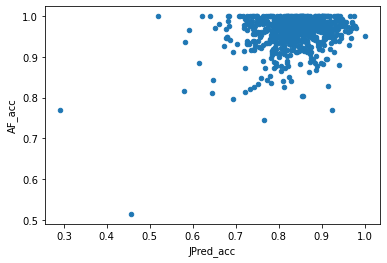

In [27]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data/match_4')
x = glob.glob('*.csv')
pdbid = []
comp = []
af_list_1 = []
jp_list_1 = []

for file in x:
    pdb_id = file[:-4]
    pdbid.append(pdb_id)
    df = pd.read_csv(file)
    af = df['AF_predictions']
    jp = df['Jpred_SS_pred']
    true = df['SS_CLASS']
    
    # comp.append((df['SS_CLASS'].value_counts(normalize=True) * 100).round(1))

    
#     # Accuracy
    af_acc = accuracy_score(true, af)
    af_list_1.append(af_acc)
    jp_acc = accuracy_score(true, jp)
    jp_list_1.append(jp_acc)


pdb_id = pd.DataFrame(pdbid)
df_af_acc = pd.DataFrame(af_list_1)
df_jp_acc = pd.DataFrame(jp_list_1)



merged = pd.concat([pdb_id, df_af_acc, df_jp_acc], axis=1)
merged.columns = ['PDB_ID', 'AF_acc', 'JPred_acc']

# merged.plot.scatter(x='JPred_acc', y='AF_acc')

In [28]:
os.chdir('/Users/Sophia/Dundee/dundee/wed/data')


a = glob.glob('match_1/*.csv')
b = glob.glob('match_2/*.csv')
c = glob.glob('match_3/*.csv')
d = glob.glob('match_4/*.csv')

print(len(a))
print(len(b))
print(len(c))
print(len(d))


727
134
71
953


In [29]:
print(len(merged))

953
